In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
wine = load_wine()
x = wine ['data']
y = wine ['target']
names = wine ['target_names']
feature_names = wine ['feature_names']

In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)

In [5]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import Tensor

In [7]:
class Model(nn.Module):
  def __init__(self, input_dim):
    super(Model, self).__init__()
    self.layer1 = nn.Linear(input_dim, 50)
    self.layer2 = nn.Linear(50, 50)
    self.layer3 = nn.Linear(50, 3)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.softmax(self.layer3(x), dim=1)
    return x

In [8]:
model = Model(x_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=13, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

In [9]:
import tqdm
import numpy as np

In [11]:
EPOCHS = 100

In [12]:
x_train = Tensor(x_train).float()
y_train = Tensor(y_train).long()
x_test = Tensor(x_test).float()
y_test = Tensor(y_test).long()

In [13]:
loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

In [15]:
for epoch in tqdm.trange(EPOCHS):
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  loss_list[epoch] = loss.item()

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    y_pred = model(x_test)
    correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
    accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 236.34it/s]


In [16]:
import matplotlib.pyplot as plt

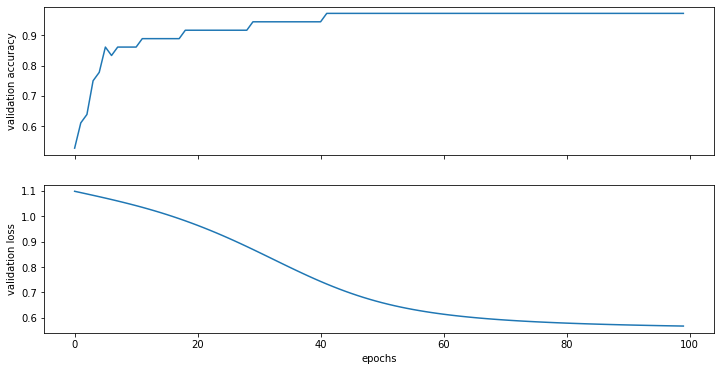

In [17]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

In [21]:
model(Tensor([[1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92]]))

tensor([[1.0000e+00, 8.5909e-07, 1.0246e-40]], grad_fn=<SoftmaxBackward0>)